In [1]:
pip install python

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement python (from versions: none)
ERROR: No matching distribution found for python


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

In [3]:
df=pd.read_csv("Amazon Sale Report.csv");
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [5]:
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


## Data Cleaning & Preprocessing

In [6]:
#Convert Date column
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

In [7]:
# Handle Missing Values
df["currency"].fillna("INR", inplace=True)
df = df[df["Amount"].notna()]   # remove rows where sales amount is missing


In [8]:
# Drop Completely Empty Columns
df.drop(columns=["New", "PendingS"], inplace=True)


In [9]:
# Fix Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [10]:
list(df.columns)

['index',
 'order_id',
 'date',
 'status',
 'fulfilment',
 'sales_channel',
 'ship-service-level',
 'category',
 'size',
 'courier_status',
 'qty',
 'currency',
 'amount',
 'ship-city',
 'ship-state',
 'ship-postal-code',
 'ship-country',
 'b2b',
 'fulfilled-by']

## Sales Overview Analysis

In [11]:
#Total Sales & Orders
total_revenue = df["amount"].sum()
total_orders = df["order_id"].nunique()

print("Total Revenue:", total_revenue)
print("Total Orders:", total_orders)


Total Revenue: 78590170.24999999
Total Orders: 112887


In [12]:
df["date"].dtype

dtype('<M8[ns]')

In [13]:
#Monthly Sales Trend
# Insight you’ll write:
# 👉 Sales show seasonal fluctuations with visible peak periods.

monthly_sales = (
    df
    .groupby(df["date"].dt.to_period("M"))["amount"]
    .sum()
)

monthly_sales.index = monthly_sales.index.to_timestamp()


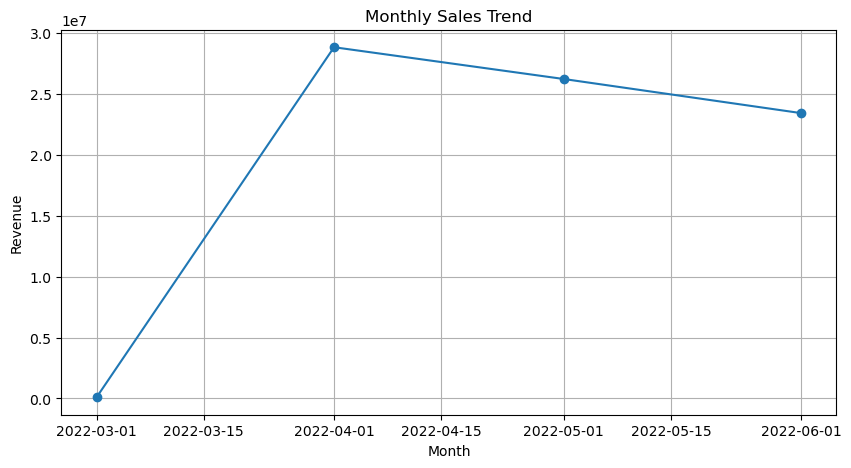

In [14]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales, marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()


## Product Analysis

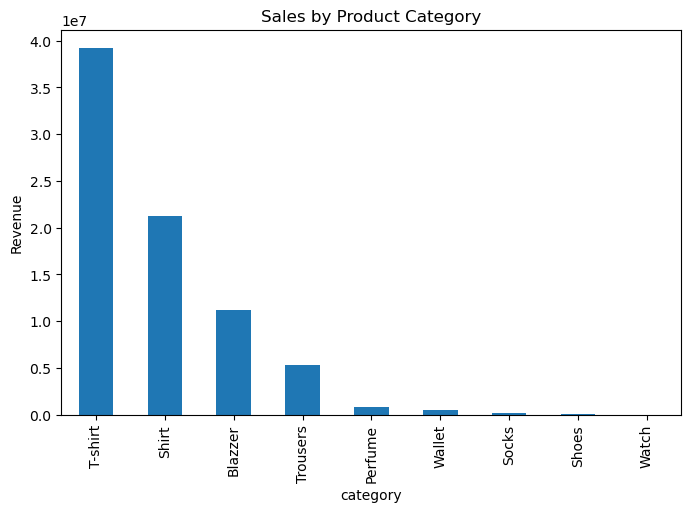

In [15]:
#Sales by Category
category_sales = df.groupby("category")["amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
category_sales.plot(kind="bar")
plt.title("Sales by Product Category")
plt.ylabel("Revenue")
plt.show()


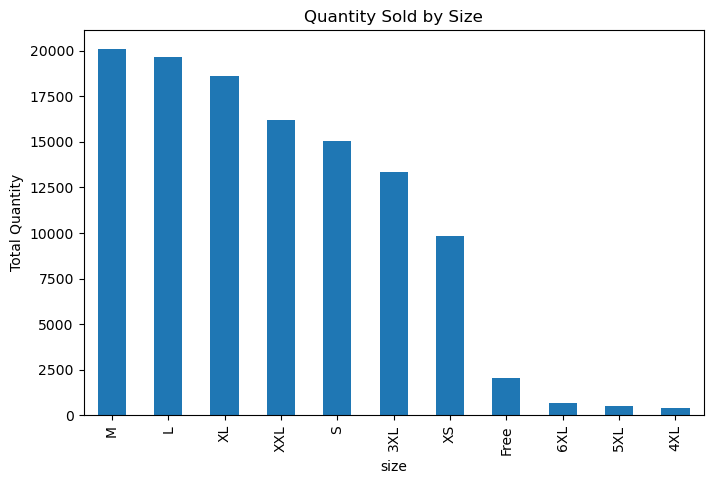

In [16]:
# Quantity Sold by Size
size_qty = df.groupby("size")["qty"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
size_qty.plot(kind="bar")
plt.title("Quantity Sold by Size")
plt.ylabel("Total Quantity")
plt.show()


## Fulfillment Analysis

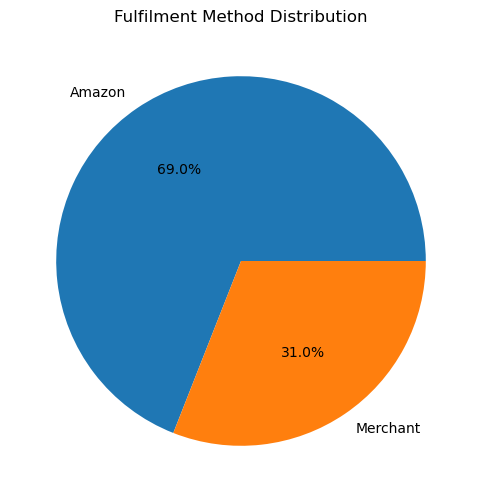

In [17]:
# Fulfillment Method Distribution
fulfilment_count = df["fulfilment"].value_counts()

plt.figure(figsize=(6,6))
fulfilment_count.plot(kind="pie", autopct="%1.1f%%")
plt.title("Fulfilment Method Distribution")
plt.ylabel("")
plt.show()


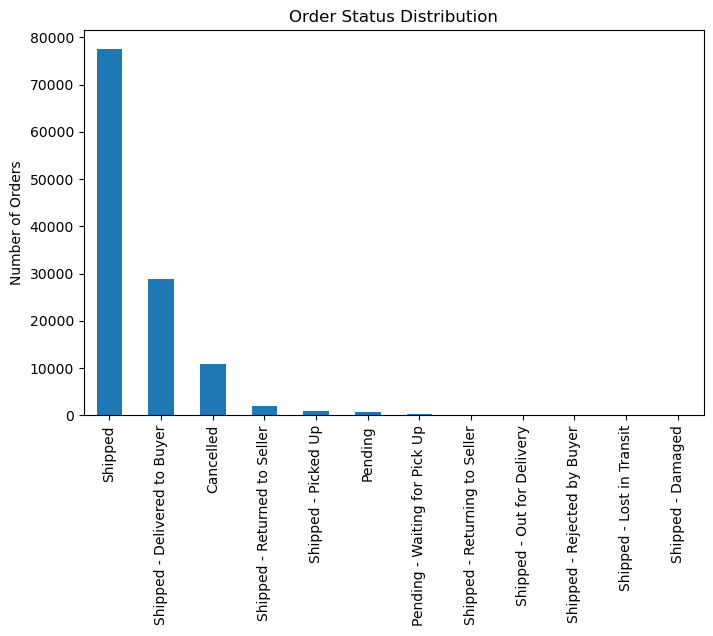

In [18]:
# Order Status Analysis
#  Insight: 👉 High cancellation or return rates indicate fulfillment or product issues.
status_count = df["status"].value_counts()

plt.figure(figsize=(8,5))
status_count.plot(kind="bar")
plt.title("Order Status Distribution")
plt.ylabel("Number of Orders")
plt.show()


## Customer Segmentation

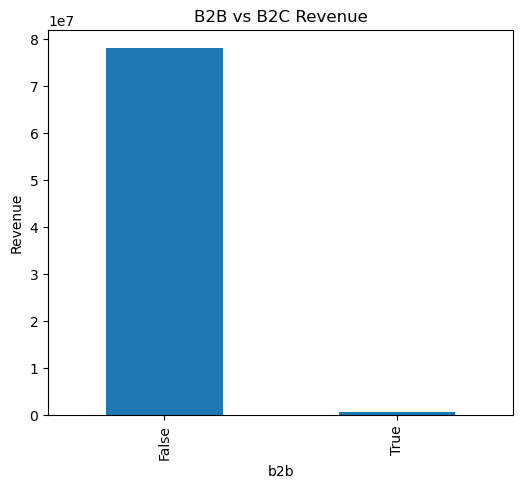

In [19]:
#B2B vs B2C Sales
# Insight:
# 👉 Identify whether business customers contribute significantly.
b2b_sales = df.groupby("b2b")["amount"].sum()

plt.figure(figsize=(6,5))
b2b_sales.plot(kind="bar")
plt.title("B2B vs B2C Revenue")
plt.ylabel("Revenue")
plt.show()


## Geographical Analysis

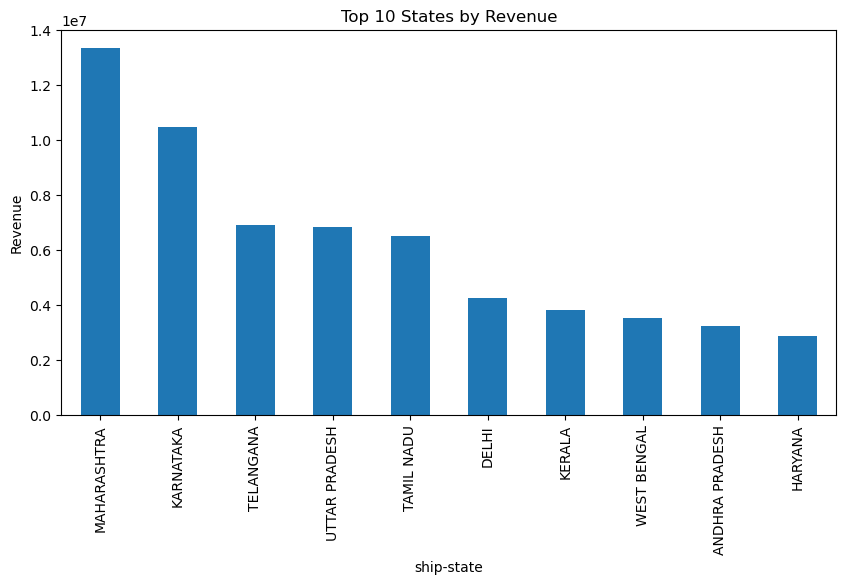

In [20]:
# Sales by State
state_sales = df.groupby("ship-state")["amount"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
state_sales.plot(kind="bar")
plt.title("Top 10 States by Revenue")
plt.ylabel("Revenue")
plt.show()


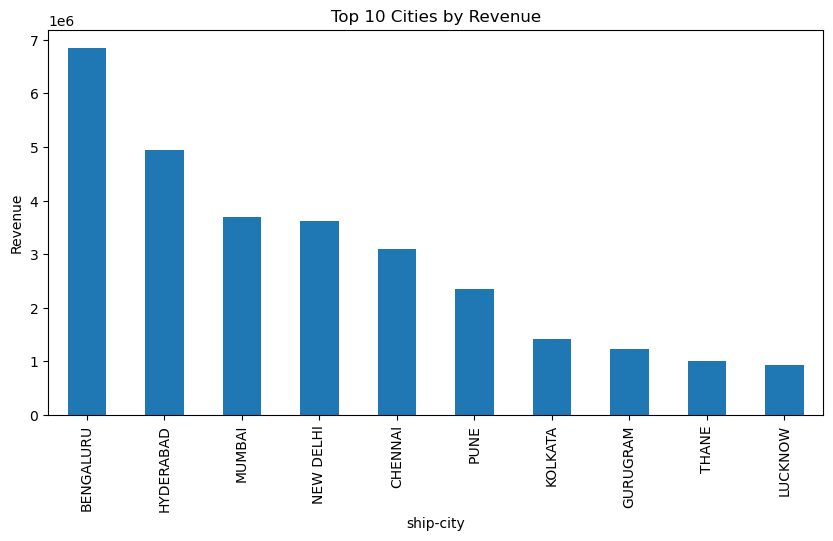

In [21]:
# Sales by City
city_sales = df.groupby("ship-city")["amount"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
city_sales.plot(kind="bar")
plt.title("Top 10 Cities by Revenue")
plt.ylabel("Revenue")
plt.show()


## Key KPIs

In [22]:
avg_order_value = total_revenue / total_orders

cancel_rate = (
    df[df["status"].str.contains("cancel", case=False)].shape[0]
    / df.shape[0]
) * 100

print("Average Order Value:", avg_order_value)
print("Cancellation Rate (%):", cancel_rate)


Average Order Value: 696.1844167176024
Cancellation Rate (%): 8.882121872317951
